In [3]:
import random
# provides functions for generating random numbers.
import seaborn
# Python visualization library based on Matplotlib. Provides a high-level interface for drawing
# attractive and informative statistical graphics.
import numpy as np
# provides support for arrays, matrices, and mathematical functions.
import pandas as pd
# provides data structures and data analysis tools for Python. Useful for working with structured data.
import matplotlib.pyplot as plt
# provides a MATLAB-like interface for creating plots and visualizations in Python.
import matplotlib.cm as cm
# colormaps for use in visualizations


# sets the default Seaborn style to 'whitegrid', which creates a white background with grid lines and
# sets the default plotting context to 'talk', which increases the font size for better readability.
seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# configures the inline backend to render high-resolution plots for better display

from sklearn.datasets import load_iris
iris_data = load_iris()

In [8]:
# contains a description of the Iris dataset
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0.5, 1.0, 'Sepal Sample')

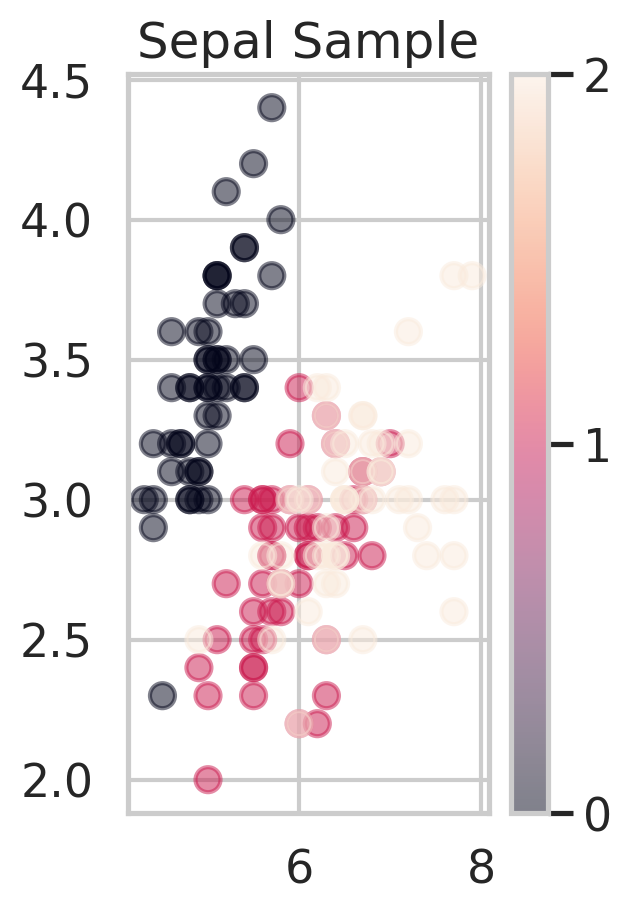

In [4]:
n_samples, n_features = iris_data.data.shape
# iris_data.data.shape: This retrieves the shape of the data attribute of the Iris dataset,
# which represents the number of samples (rows) and the number of features (columns).
# n_samples, n_features = iris_data.data.shape: This line unpacks the shape tuple into two variables:
# n_samples (number of samples) and n_features (number of features).

plt.subplot(1, 2, 1)
# creates a subplot grid with 1 row and 2 columns, and selects the first subplot for plotting.

scatter_plot = plt.scatter(iris_data.data[:,0], iris_data.data[:,1], alpha=0.5, c=iris_data.target)
# iris_data.data[:,0] and iris_data.data[:,1] are slices of the data array,
# representing the first and second features (sepal length and sepal width, respectively).
# c=iris_data.target assigns colors to the points based on the target variable (class labels).

plt.colorbar(ticks=([0, 1, 2]))
# adds a colorbar to the plot, which is useful for interpreting the colors in the scatter plot.
# specifies the ticks (values) to be shown on the colorbar. In this case, it corresponds to the three classes of iris plants.

plt.title('Sepal Sample')

Text(0.5, 1.0, 'Petal Sample')

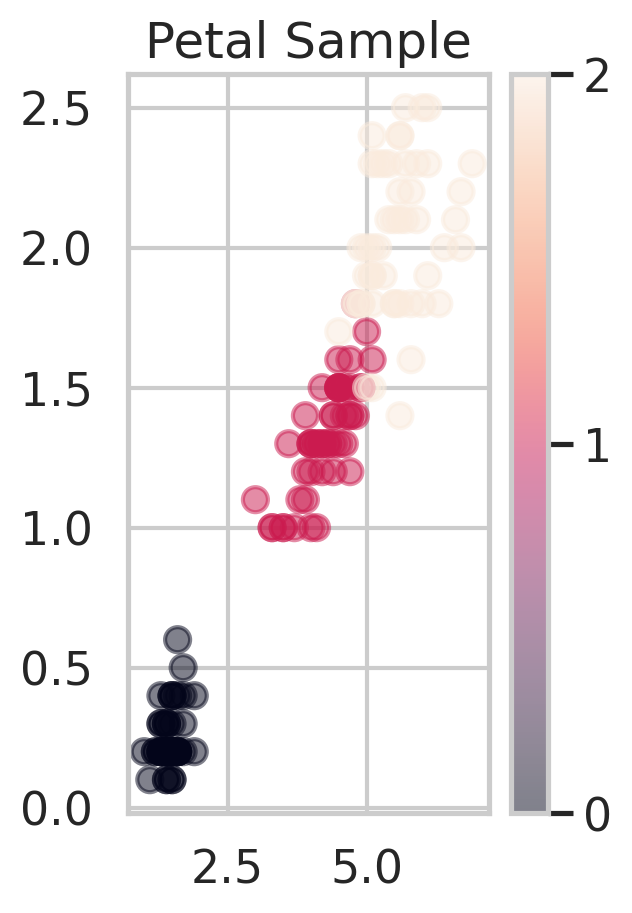

In [5]:
plt.subplot(1, 2, 2)
# selects the second subplot for plotting in the subplot grid.

scatter_plot_2 = plt.scatter(iris_data.data[:,2], iris_data.data[:,3], alpha=0.5, c=iris_data.target)
# creates another scatter plot but using the third and fourth features (petal length and petal width).
# iris_data.data[:,2] and iris_data.data[:,3] are slices of the data array,
# representing the third and fourth features (petal length and petal width, respectively).

plt.colorbar(ticks=([0, 1, 2]))
# Adds a colorbar to the plot with ticks corresponding to the three classes of iris plants.

plt.title('Petal Sample')

In [6]:
from sklearn.model_selection import train_test_split

# Join X and Y
iris_X = iris_data.data
iris_y = iris_data.target

# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.2, random_state=123)


Epoch  1 - Total Error:  0.09954419834591748
Epoch  50 - Total Error:  0.05552885704249518
Epoch  100 - Total Error:  0.04562154425380795
Epoch  150 - Total Error:  0.0392992895452858
Epoch  200 - Total Error:  0.03560621762122824
Epoch  250 - Total Error:  0.033308080794687674
Epoch  300 - Total Error:  0.031225000055481646
Epoch  350 - Total Error:  0.02959184280197756
Epoch  400 - Total Error:  0.02830856144043615
Epoch  450 - Total Error:  0.027077334754677693
Epoch  500 - Total Error:  0.025765236739976306
Epoch  550 - Total Error:  0.024336962761532608
Epoch  600 - Total Error:  0.02282158413826765
Epoch  650 - Total Error:  0.0212805810585985
Epoch  700 - Total Error:  0.01977842346282823


<ipython-input-47-f4d4b6eb6cb3>:80: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


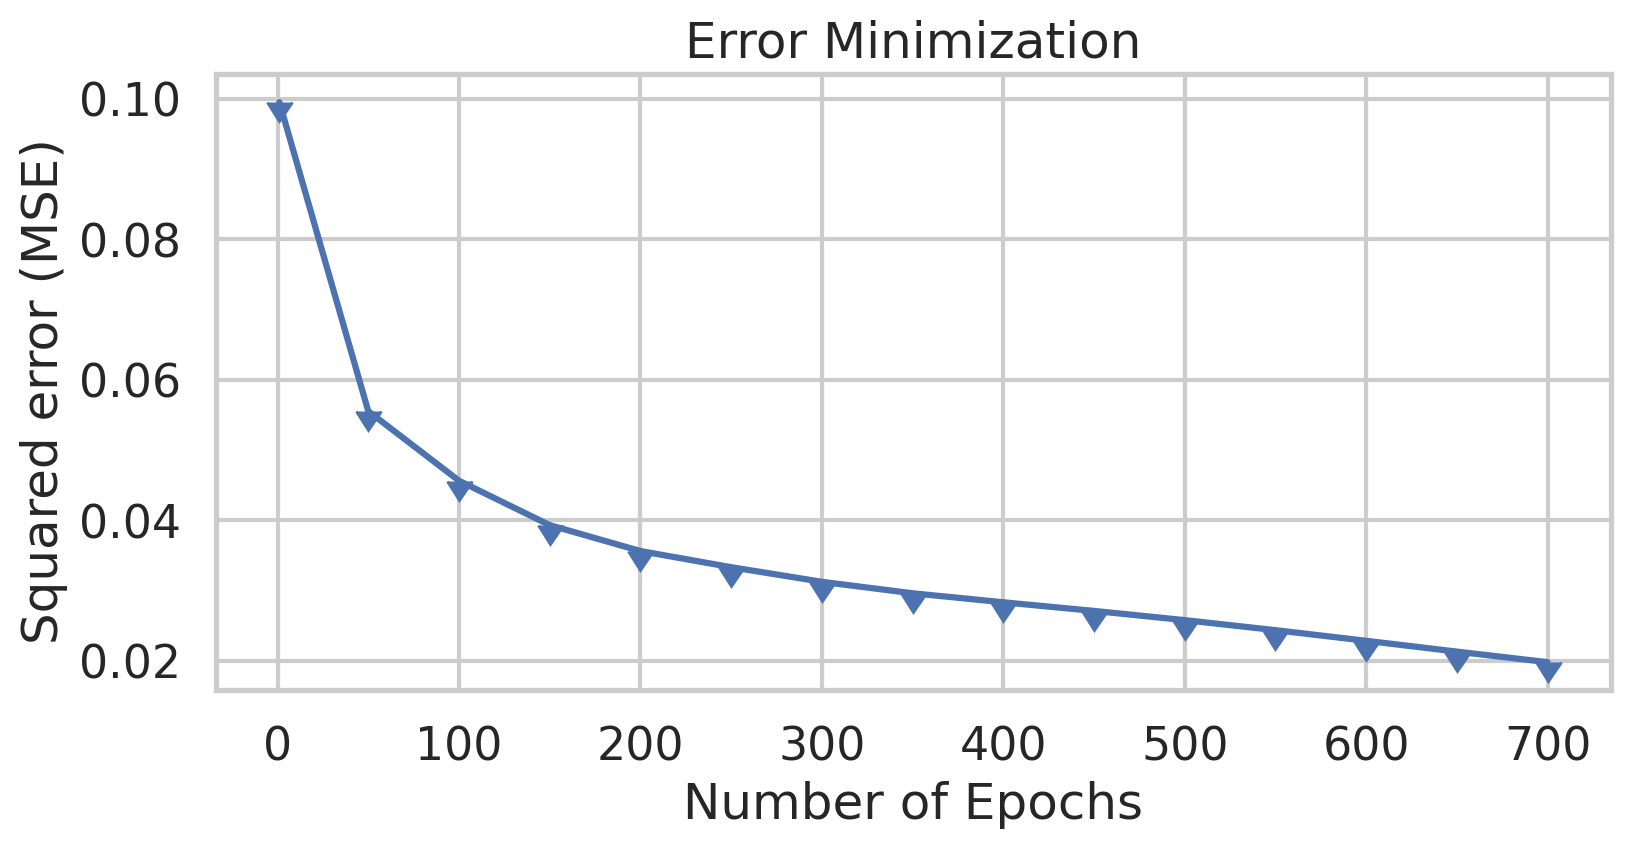

In [47]:
class MultiLayerPerceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, params=None):
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Output Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.BiasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.activation['sigmoid'] # Activation function
            self.deriv = self.derivation['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epochs']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.activation[params['ActivationFunction']]
            self.deriv = self.derivation[params['ActivationFunction']]

            'Starting Bias and Weights'
            self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
            self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
            self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
            self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
            self.classes_number = 3

    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    activation = {'sigmoid': (lambda x: 1/(1 + np.exp(-x)))}
    derivation = {'sigmoid': (lambda x: x*(1-x))}

    def backpropagation_algorithm(self, x):
        DELTA_output = []
        # 'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        # represents the error between the actual output (self.output) and the predicted output

        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        # calculated using the derivative of the activation function (self.deriv) applied to the predicted output
        # key step in backpropagation where we compute the gradient of the error with respect to the output of the neural network

        arrayStore = []
        # 'Stage 2 - Update weights OutputLayer and HiddenLayer'

        # nested loop iterates over all the neurons in the hidden layer and output layer.
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])

        # 'Stage 3 - Error: HiddenLayer'
        # computes the delta (error) for the hidden layer neurons.
        # matrix multiplication between the weight matrix connecting the output layer to the hidden layer (self.WEIGHT_output)
        # and the delta values calculated for the output layer (DELTA_output)
        # operation calculates the contribution of the output layer errors to the hidden layer.
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
        # result is then element-wise multiplied by the derivative of the activation function applied to the output of the hidden layer
        # This computes the delta for the hidden layer neurons, which represents the gradient of the error with respect to the output of the hidden layer.

        # 'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])

        # These nested loops iterate over all the neurons in the output layer and hidden layer.
        # For each pair of neurons (i, j), it updates the weight connecting the ith neuron
        # in the output layer to the jth neuron in the hidden layer.
        # The weight update is performed using the gradient descent algorithm: the weight is adjusted in the direction that reduces the error,
        # scaled by the learning rate (self.learningRate) and the corresponding delta value (delta_hidden[j]).
        # Additionally, the biases of the hidden layer neurons (self.BIAS_hidden) are updated using a similar approach.

    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    # responsible for visualizing the error over epochs during the training process.

    def predict(self, X, y):
        # X: The input features or data on which predictions are to be made.
        # y: The actual labels corresponding to the input features X.

        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output

        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])

        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0:
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])

        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):
        count_epoch = 1
        total_error = 0
        n = len(X);
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X):
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0):
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}

                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error

                'Backpropagation : Update Weights'
                self.backpropagation_algorithm(inputs)

            total_error = (total_error / n)
            if((count_epoch % 50 == 0) or (count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)

            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)


            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)



        return self

dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epochs':700, 'LearningRate':0.005,'BiasHiddenValue':-1,
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)




    _id           class  output  hoped_output
0     0  Iris-virginica       2             1
1     1  Iris-virginica       2             2
2     2  Iris-virginica       2             2
3     3     Iris-setosa       0             1
4     4     Iris-setosa       0             0
5     5  Iris-virginica       2             2
6     6  Iris-virginica       2             1
7     7     Iris-setosa       0             0
8     8     Iris-setosa       0             0
9     9  Iris-virginica       2             1
10   10  Iris-virginica       2             2
11   11     Iris-setosa       0             0
12   12  Iris-virginica       2             1
13   13  Iris-virginica       2             2
14   14  Iris-virginica       2             2
15   15  Iris-virginica       2             2
16   16     Iris-setosa       0             0
17   17     Iris-setosa       0             0
18   18  Iris-virginica       2             1
19   19     Iris-setosa       0             0
20   20     Iris-setosa       0   

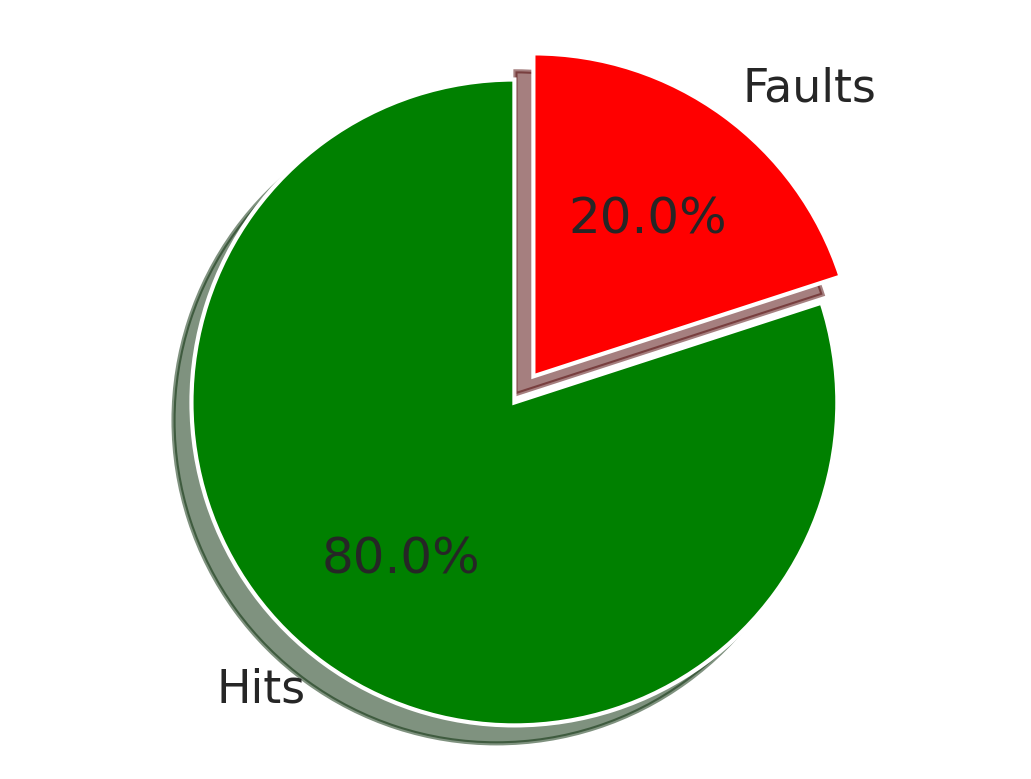

- Accuracy Iris-Setosa: 100.00 %
- Accuracy Iris-Versicolour: 0.00 %
- Accuracy Iris-Virginica: 100.00 %


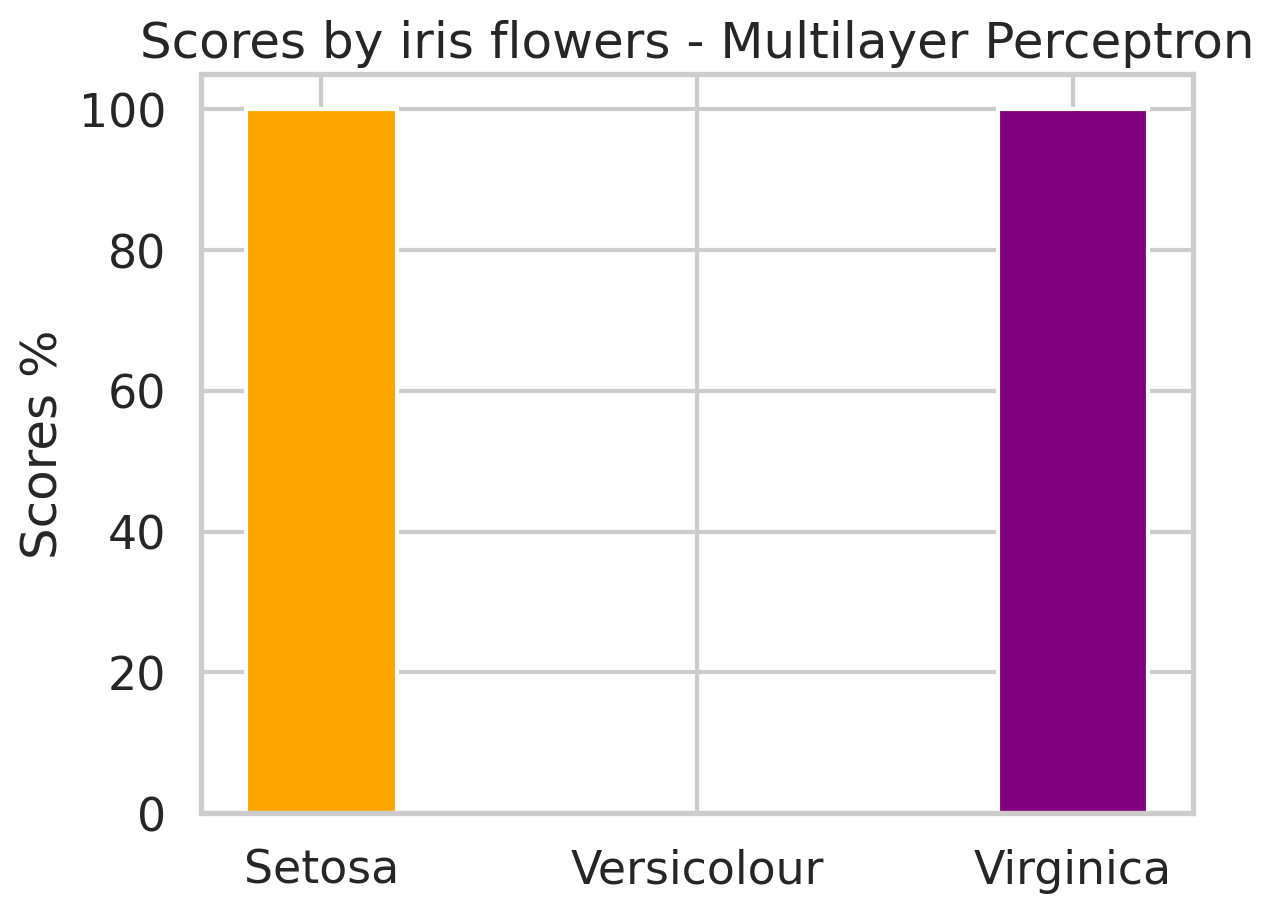

In [50]:
# Count the number of instances for each class in the test set
n_set = np.count_nonzero(test_y == 0)
n_vers = np.count_nonzero(test_y == 1)
n_virg = np.count_nonzero(test_y == 2)

# Initialize variables to count correct predictions for each class
score_set = score_vers = score_virg = 0

# Loop through each prediction and compare with the true labels
for i in range(len(test_y)):
    if test_y[i] == prev[i]:
        if test_y[i] == 0:
            score_set += 1
        elif test_y[i] == 1:
            score_vers += 1
        elif test_y[i] == 2:
            score_virg += 1

# Calculate accuracy for each class
acc_set = (score_set / n_set) * 100
acc_vers = (score_vers / n_vers) * 100
acc_virg = (score_virg / n_virg) * 100
# Printing data frame
print(dataframe)

# Calculate the total number of samples in the test set
n_samples = len(test_y)

# Print overall accuracy
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",n_samples)
print("* Iris-Setosa:",n_set,"samples")
print("* Iris-Versicolour:",n_vers,"samples")
print("* Iris-Virginica:",n_virg,"samples")

# Create graph for hits and faults
graph_hits = [hits, faults]
labels = 'Hits', 'Faults'
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(graph_hits, explode=explode, colors=['green','red'], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Calculate accuracy for each class
acc_set = (score_set / n_set) * 100
acc_vers = (score_vers / n_vers) * 100
acc_virg = (score_virg / n_virg) * 100

# Print accuracy for each class
print("- Accuracy Iris-Setosa:", "%.2f" % acc_set, "%")
print("- Accuracy Iris-Versicolour:", "%.2f" % acc_vers, "%")
print("- Accuracy Iris-Virginica:", "%.2f" % acc_virg, "%")

# Create bar graph for accuracy by iris flowers
names = ["Setosa", "Versicolour", "Virginica"]
x1 = [2.0, 4.0, 6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set, color='orange', label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers, color='green', label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg, color='purple', label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names)
plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()
